# Predicting House Sale Prices 

In this project, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. We'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) and download the dataset [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns:

- `Lot Area` : Lot size in square feet.

- `Overall Qual` : Rates the overall material and finish of the house.

- `Overall Cond` : Rates the overall condition of the house.

- `Year Built` : Original construction date.

- `Low Qual Fin SF` : Low quality finished square feet (all floors).

- `Full Bath` : Full bathrooms above grade.

- `Fireplaces` : Number of fireplaces.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data 
dataset = pd.read_csv("AmesHousing.txt", sep='\t')

In [3]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Section 1. Data Exploration

First we need to take cake of some outliers.

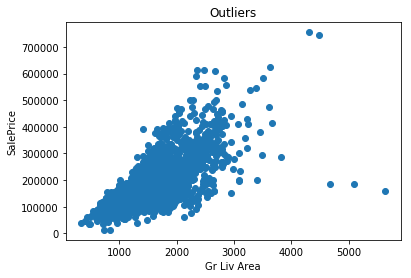

In [4]:
plt.scatter(dataset['Gr Liv Area'], dataset['SalePrice'])
plt.title("Outliers")
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()

The special note from the author of the dataset recommends removing "any houses with more than 4000 square feet" from the dataset. We choose to follow this advise.

In [5]:
dataset = dataset[dataset['Gr Liv Area'] < 4000]

## 1.1 Analysing Sale Price
Now we will take some time to describe our target feature 'SalePrice'.

In [6]:
# target feature
TargetCol = ['SalePrice']

# Descriptive statistics
dataset[TargetCol].describe()

,SalePrice
count,2925.000000
mean,180411.574701
std,78554.857286
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,625000.000000


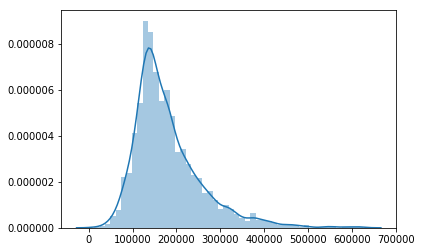

In [7]:
# Distribution
sns.distplot(dataset[TargetCol]);

**All seems correct, we have a usual price distribution with a positive skewness and a distribution peakedness (compare to the normal distribution).**

## 1.2 The Other Features

In [8]:
dataset.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

**The dataset contains a lot of features. So, we first chose to regroup variables according to their types : nominal, ordinal and numerical. We are also dropping two unnecessary features (order and PID).**

In [9]:
# drop features
dropCol = ['Order', 'PID']
dataset = dataset.drop(dropCol, axis=1)

In [10]:
# create a list for each types of feature.  
CatCol = ['MS Zoning', 'Land Contour', 'Lot Config', 'MS SubClass', 'Street', 'Alley', 'Condition 1', 'Condition 2',
          'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
          'Neighborhood', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 
          'Sale Condition']

CatOrdCol = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
             'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
             'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
             'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

NumCol = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
          'Mas Vnr Area', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 
          'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'BsmtFin SF 2', 
          'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 
          'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 
          'Yr Sold']

### 1.2.1 Ordinal Features

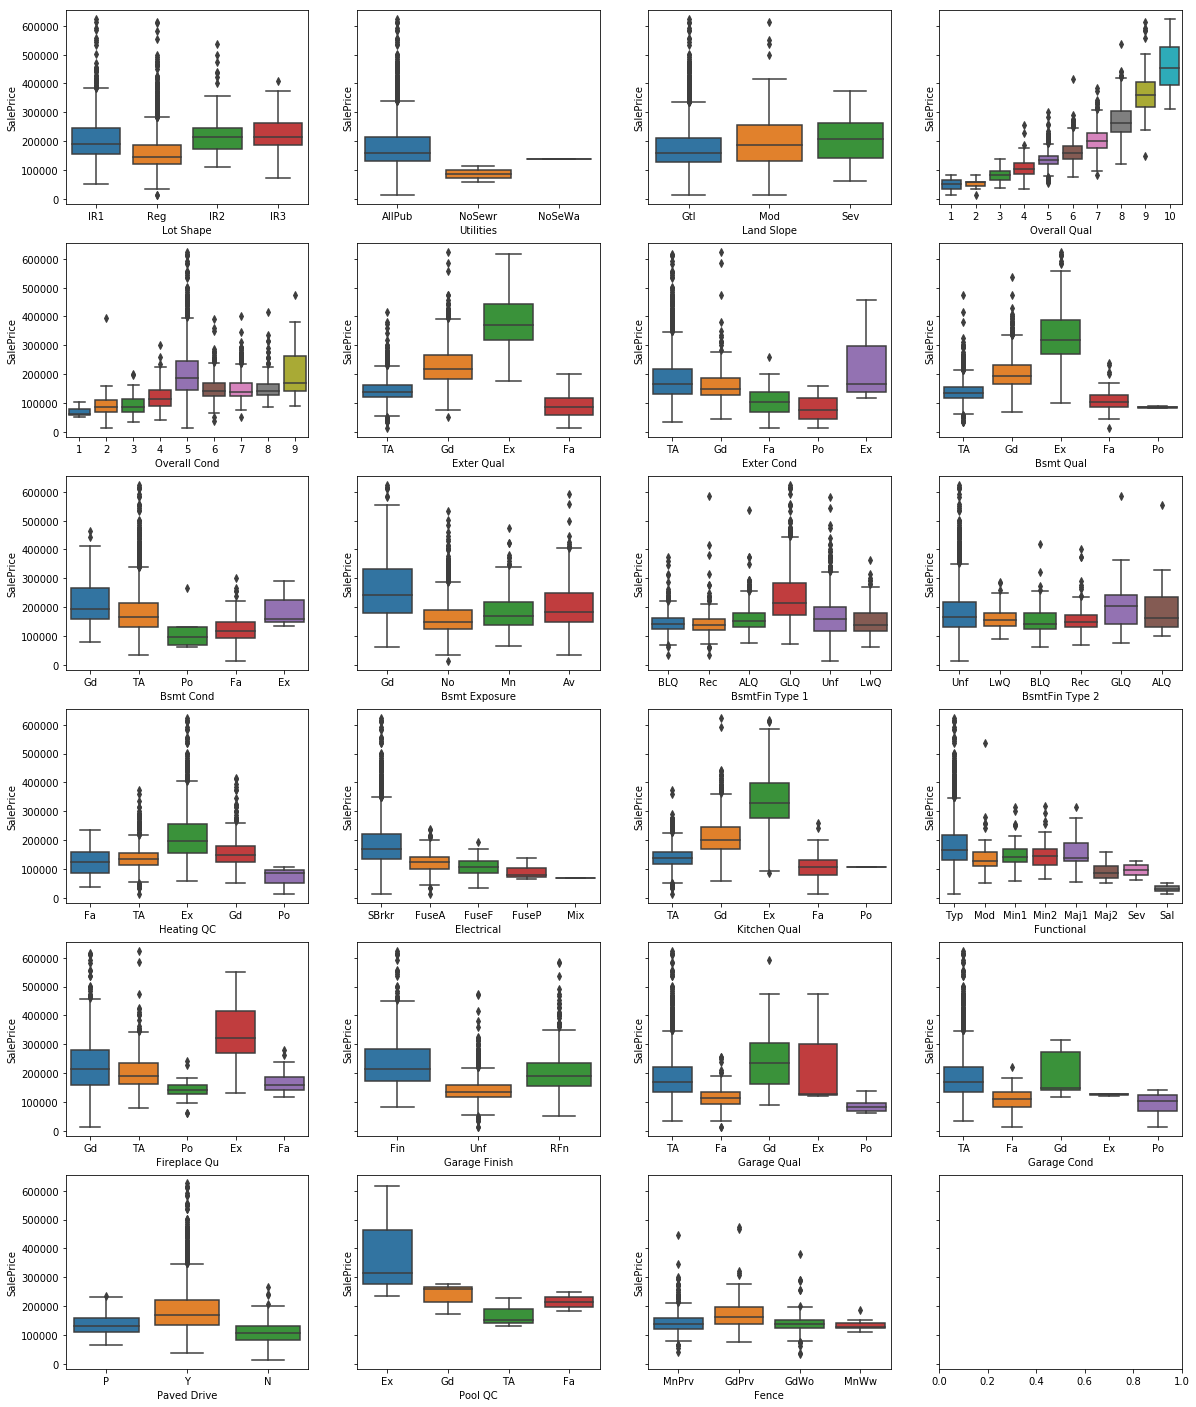

In [11]:
f, axes = plt.subplots(6, 4, sharey=True, figsize=(20,25))
ax = axes.ravel()

for i, c in enumerate(CatOrdCol): 
    sns.boxplot(y="SalePrice", x=c, data=dataset, ax=ax[i])

**The quality features (`Exter Qual`, `Bsmt Qual`, `Heating QC`, `Kitchen Qual`, `Fireplace Qu`) are positively correlate to the target feature, but `Overall Qual` seems to sum up all the information on one feature and the correlation is high. So, we are only keeping `Overall Qual`**

In [12]:
CatOrdCol = ['Overall Qual']

### 1.2.2 Numerical Features

In [13]:
NumCol.append('SalePrice')

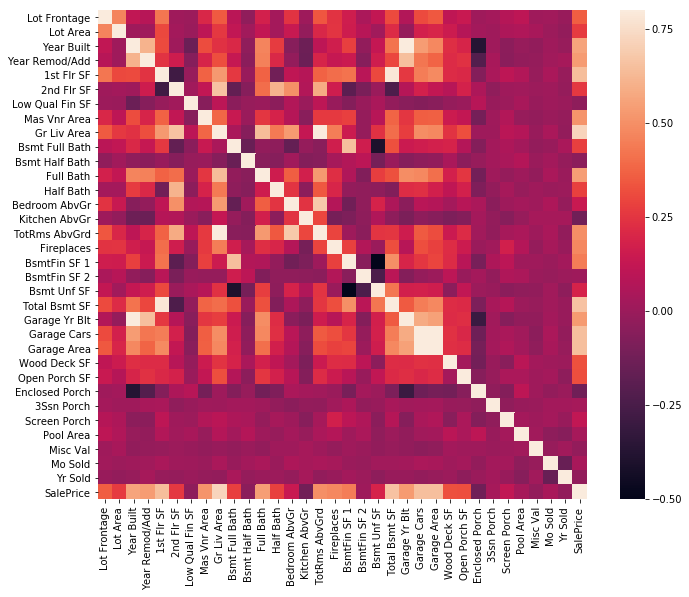

In [14]:
#correlation matrix
cm = dataset[NumCol].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, vmax=.8, square=True);

The heatmap shows us high correlation between :
- `1st flr SF` and `Total Bsmt SF`

- `Garage Car` and `Garage Area`

- `Garage Yr Blt` and `Year Built`

- `Year Built` and `Year Remod/Add`

- `Gr Liv Area` and `TotRms AbvGrd` 

- `Gr Liv Area` and `1st flr SF` 

- `Gr Liv Area` and `2nd flr SF`


Moreover, the heatmap also give us great information about the correlation with the target feature `SalePrice`. Thus, `Gr Liv Area` and `Total Bsmt SF` are strongly correlated with `SalePrice`. `Garage Cars`, `Garage Area`, `Total Bsmt SF` and `1st Floor SF` are also some of the most strongly correlated features. Finally, `Full Bath`, `TotRms AbvGrd` and `Year Built` are moderately correlate with the target feature.

Even if multicollinearity does not reduce the predictive power, here we choose to drop highly correlated features. We keep `Gr Liv Area`, `Garage Cars`, `Total Bsmt SF`, `Full Bath`, `Year Built`

In [15]:
NumCol = ['Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Full Bath', 'Year Built']

In [16]:
dataset.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

### 1.2.3 Nominal Features

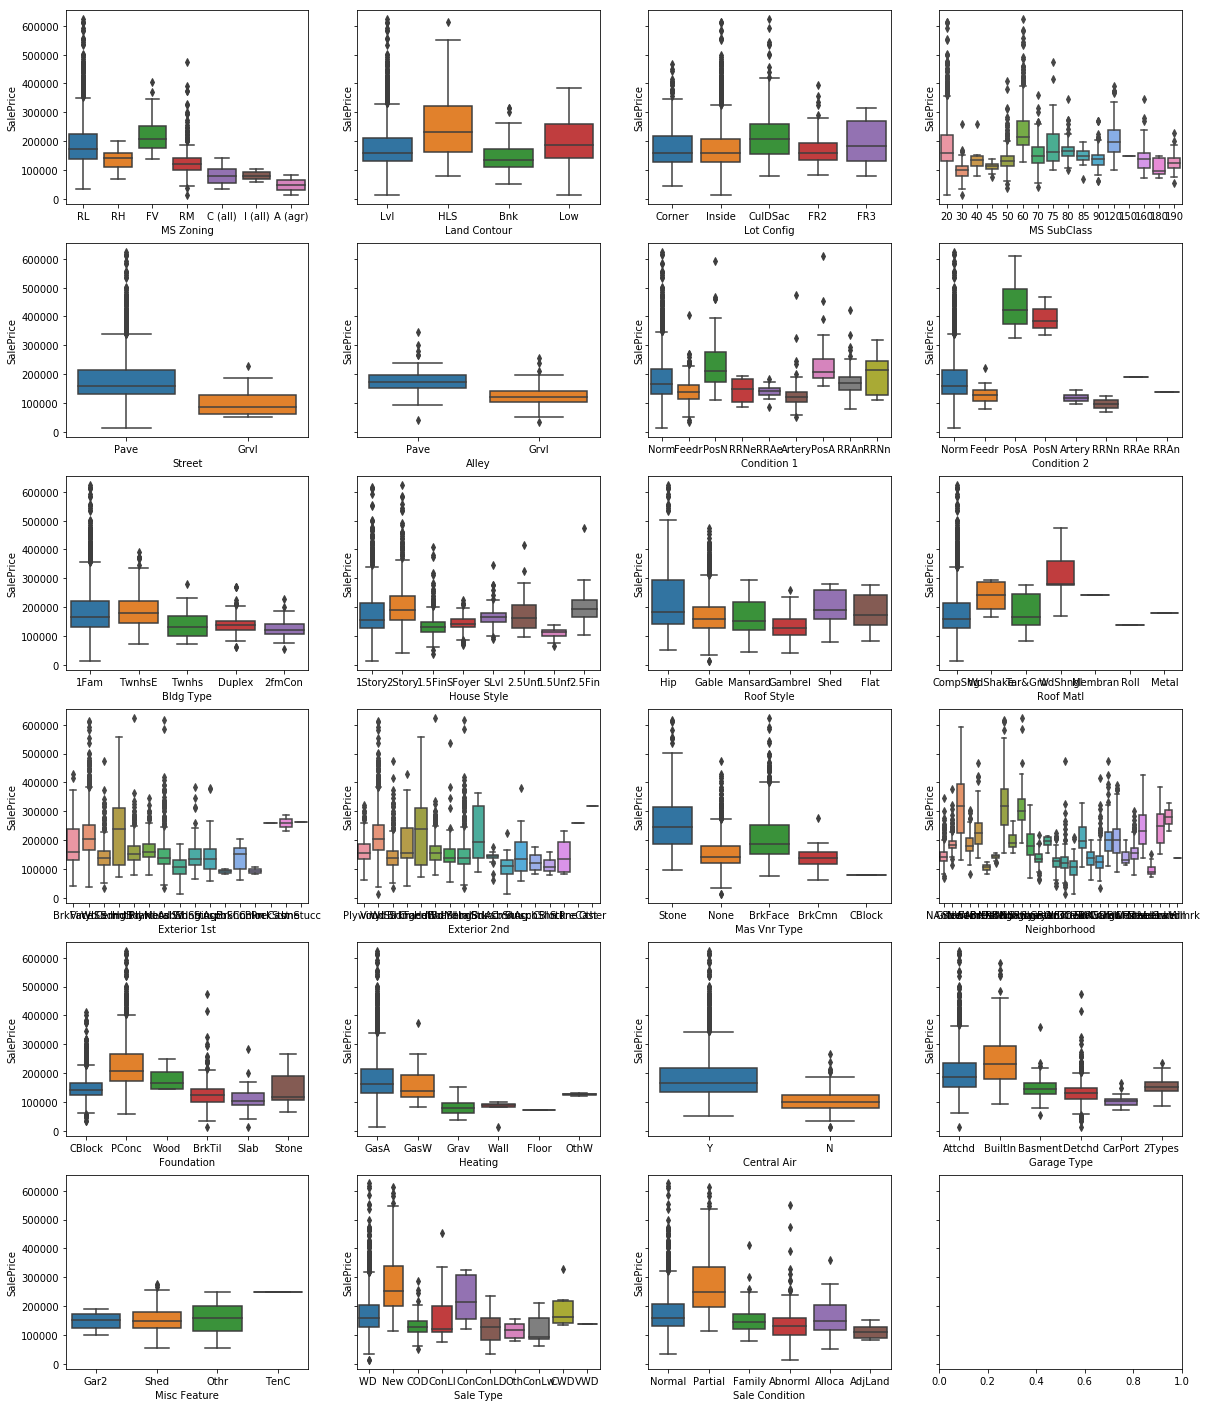

In [17]:
f, axes = plt.subplots(6, 4, sharey=True, figsize=(20,25))
ax = axes.ravel()

for i, c in enumerate(CatCol): 
    sns.boxplot(y="SalePrice", x=c, data=dataset, ax=ax[i])

**`Street` and `Central Air` seems to be good candidates for our model, but we need to create dummies first.**

In [18]:
CatCol = ['Street', 'Central Air']

In [19]:
# checking for nan values
dataset[CatCol].isnull().sum()

Street         0
Central Air    0
dtype: int64

In [20]:
# create dummies
dum = pd.get_dummies(dataset[CatCol], drop_first=True)
dataset = pd.concat([dataset, dum], axis=1)

In [21]:
CatCol = ['Street_Pave', 'Central Air_Y']

In [22]:
# Save our features
features = np.concatenate((CatOrdCol, NumCol, CatCol, ['SalePrice']))

In [23]:
final_dataset = dataset[features].dropna()

In [24]:
features

array(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
       'Full Bath', 'Year Built', 'Street_Pave', 'Central Air_Y',
       'SalePrice'],
      dtype='<U13')

# Section 2. Predict Sale Price

In [25]:
y = final_dataset['SalePrice'].values
X = final_dataset[features].drop(['SalePrice'], axis=1).values

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 2.1. Models selection

In [27]:
# Using Pipeline and Grid Search libraries to find the best parameters
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models libs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

### 2.1.1 Ordinary least squares Linear Regression (OLS)

In [28]:
lr = LinearRegression()

# Fit our pipeline on X_train and y_train
lr.fit(X_train, y_train)

# predict on test set
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# test the predictions performance
print('R2 : {} (R2-train : {}) and MSE : {} (RMSE: {})'.format(r2_score(y_test, y_pred),
                                                               r2_score(y_train, y_pred_train),
                                                               mean_squared_error(y_test, y_pred),
                                                               mean_squared_error(y_test, y_pred)**(1/2)
                                                              ))

R2 : 0.8192871865277602 (R2-train : 0.8246883405100223) and MSE : 1277616099.5266747 (RMSE: 35743.75609147246)


### 2.1.2 Linear least squares with l2 regularization.

In [29]:
# Declare data preprocessing steps
pipeline_r = make_pipeline(Ridge(random_state=42))

# Declare hyperparameters to tune
parameters_r = {'ridge__alpha': [10, 20, 40]}

# Tune model using cross-validation pipeline
cv_r = GridSearchCV(pipeline_r, param_grid=parameters_r, cv=10)

# Fit our pipeline on X_train and y_train
cv_r.fit(X_train, y_train)

# predict on test set
y_pred = cv_r.predict(X_test)
y_pred_train = cv_r.predict(X_train)

print('Best Parameters : {}'.format(cv_r.best_params_))
# test the predictions performance
print('BEST SCORE : {}, R2 : {} (R2-train : {}) and MSE : {} (RMSE: {})'.format(cv_r.best_score_,
                                                                     r2_score(y_test, y_pred),
                                                                     r2_score(y_train, y_pred_train),
                                                                     mean_squared_error(y_test, y_pred),
                                                                     mean_squared_error(y_test, y_pred)**(1/2)
                                                                    ))

Best Parameters : {'ridge__alpha': 40}
BEST SCORE : 0.8219496682082076, R2 : 0.8194762884720386 (R2-train : 0.8245807249991907) and MSE : 1276279173.362892 (RMSE: 35725.049662147314)


### 2.2.3 Linear regression with combined L1 and L2 priors as regularizer

In [30]:
# Declare data preprocessing steps
pipeline_en = make_pipeline(ElasticNet(random_state=42))

# Declare hyperparameters to tune
parameters_en = {'elasticnet__alpha' : [0.1, 1, 10], 
                 'elasticnet__l1_ratio': [.01, .1, .5, .9, .99]}

# Tune model using cross-validation pipeline
cv_en = GridSearchCV(pipeline_en, param_grid=parameters_en, cv=10)

# Fit our pipeline on X_train and y_train
cv_en.fit(X_train, y_train)

# predict on test set
y_pred = cv_en.predict(X_test)
y_pred_train = cv_en.predict(X_train)

print('Best Parameters : {}'.format(cv_en.best_params_))
# test the predictions performance
print('BEST SCORE : {}, R2 : {} (R2-train : {}) and MSE : {} (RMSE: {})'.format(cv_en.best_score_,
                                                                     r2_score(y_test, y_pred),
                                                                     r2_score(y_train, y_pred_train),
                                                                     mean_squared_error(y_test, y_pred),
                                                                     mean_squared_error(y_test, y_pred)**(1/2)
                                                                    ))

Best Parameters : {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}
BEST SCORE : 0.8219276832536345, R2 : 0.8194708351129438 (R2-train : 0.8246349316084587) and MSE : 1276317727.9027836 (RMSE: 35725.5892590001)


### 2.1.4 Gradient Boosting for regression

In [31]:
# Declare data preprocessing steps
pipeline_gbr = make_pipeline(StandardScaler(),
                             GradientBoostingRegressor(random_state=42))

# Declare hyperparameters to tune
parameters_gbr = {'gradientboostingregressor__n_estimators': [100, 200, 300], 
                  'gradientboostingregressor__learning_rate':[0.2, 0.1, 0.05],
                  'gradientboostingregressor__max_depth': [None, 3, 2, 1]}

# Tune model using cross-validation pipeline
cv_gbr = GridSearchCV(pipeline_gbr, param_grid=parameters_gbr, cv=10)

# Fit our pipeline on X_train and y_train
cv_gbr.fit(X_train, y_train)

# predict on test set
y_pred = cv_gbr.predict(X_test)
y_pred_train = cv_gbr.predict(X_train)

print('Best Parameters : {}'.format(cv_gbr.best_params_))
# test the predictions performance
print('BEST SCORE : {}, R2 : {} (R2-train : {}) and MSE : {} (RMSE: {})'.format(cv_gbr.best_score_,
                                                                     r2_score(y_test, y_pred),
                                                                     r2_score(y_train, y_pred_train),
                                                                     mean_squared_error(y_test, y_pred),
                                                                     mean_squared_error(y_test, y_pred)**(1/2)
                                                                    ))

Best Parameters : {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__n_estimators': 100, 'gradientboostingregressor__max_depth': 3}
BEST SCORE : 0.8741826620443696, R2 : 0.9031382508326575 (R2-train : 0.9177776601630065) and MSE : 684799975.0915358 (RMSE: 26168.683098152567)


**The three linear models (OLS, Ridge and ElasticNet) performances are pretty much the same (R2 is around 0.81 - 0.82). Our last model (Gradient Boosting) performs very well, the R2 on the test set and on the trainning set are above 90 %. The RMSE is also very good two (26 168 compared to the Sale Price standard deviation of 79 886). I use a slightly different model and I was able to reach the top 16% on Kaggle.**